### Required Libraries

In [1]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
import mediapipe as mp
import matplotlib.pyplot as plt
import cv2 
from Preprocessing_Utility_Functions import *
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import joblib  # For saving the model


### read df from csv

In [2]:
df=pd.read_csv('face_landmarks.csv')    

### apply pca 

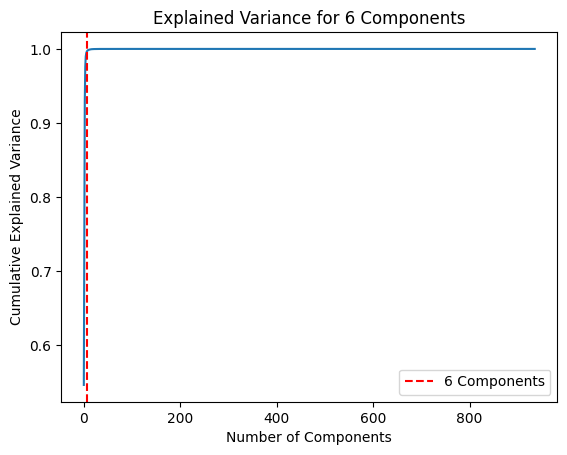

Number of components explaining at least 99.0% of the variance: 6


In [3]:

# Fit PCA
pca = PCA(n_components=None)
pca.fit(df.iloc[:,0:-3])

# Calculate explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)

# Set the desired explained variance threshold
desired_variance_threshold = 0.99
# Find the number of components that explain at least the desired variance
num_components = np.argmax(cum_explained_variance >= desired_variance_threshold) + 1

# Plot cumulative explained variance
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title(f'Explained Variance for {num_components} Components')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} Components')
plt.legend()
plt.show()

print(f'Number of components explaining at least {desired_variance_threshold * 100}% of the variance: {num_components}')


In [4]:
#apply PCA
pca=PCA(n_components=6)
#fit PCA
#convert to dataframe
df_pca=pca.fit_transform(df.iloc[:,0:-3])


### split data

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_pca, df.iloc[:, -3:], test_size=0.1)
X = x_train
yroll = y_train['roll']
ypitch = y_train['pitch']
yyaw = y_train['yaw']

## test models 

### XGBRegressor

In [6]:

xgboostModelroll=xgb.XGBRegressor()
xgboostModelroll.fit(X, yroll)
xgboostModelpitch=xgb.XGBRegressor()
xgboostModelpitch.fit(X, ypitch)
xgboostModelyaw=xgb.XGBRegressor()
xgboostModelyaw.fit(X, yyaw)
print("xgboost model :")

print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],xgboostModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],xgboostModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],xgboostModelyaw.predict(x_test)))



xgboost model :
mean_squared_error for roll:
0.018822356227642965
mean_squared_error for pitch:
0.09964305805184098
mean_squared_error for yaw:
0.019200191527818322


### randeom forest

In [7]:
rfModelroll=RandomForestRegressor()
rfModelroll.fit(X, yroll)
rfModelpitch=RandomForestRegressor()
rfModelpitch.fit(X, ypitch)
rfModelyaw=RandomForestRegressor()
rfModelyaw.fit(X, yyaw)
print("RandomForestRegressor model :")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],rfModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],rfModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],rfModelyaw.predict(x_test)))


RandomForestRegressor model :
mean_squared_error for roll:
0.02762621521912666
mean_squared_error for pitch:
0.02268208032700873
mean_squared_error for yaw:
0.010531897901786252


### liner reg

In [8]:
lrModelroll=LinearRegression()    
lrModelroll.fit(X, yroll)
lrModelpitch=LinearRegression()
lrModelpitch.fit(X, ypitch)
lrModelyaw=LinearRegression()
lrModelyaw.fit(X, yyaw)
print("LinearRegression model :")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],lrModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],lrModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],lrModelyaw.predict(x_test)))

LinearRegression model :
mean_squared_error for roll:
0.02907833461265693
mean_squared_error for pitch:
0.03256587637479284
mean_squared_error for yaw:
0.03820413268093144


### svr

In [9]:
svrModelroll=SVR()
svrModelroll.fit(X, yroll)
svrModelpitch=SVR()
svrModelpitch.fit(X, ypitch)
svrModelyaw=SVR()
svrModelyaw.fit(X, yyaw)
print("SVR model :")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],svrModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],svrModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],svrModelyaw.predict(x_test)))


SVR model :
mean_squared_error for roll:
0.015720409868768794
mean_squared_error for pitch:
0.022043175502673543
mean_squared_error for yaw:
0.00927876620977815


### GradientBoostingRegressor

In [10]:
gbModelroll=GradientBoostingRegressor()
gbModelroll.fit(X, yroll)
gbModelpitch=GradientBoostingRegressor()
gbModelpitch.fit(X, ypitch)
gbModelyaw=GradientBoostingRegressor()
gbModelyaw.fit(X, yyaw)
print("GradientBoostingRegressor model :")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],gbModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],gbModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],gbModelyaw.predict(x_test)))

GradientBoostingRegressor model :
mean_squared_error for roll:
0.028119144348096474
mean_squared_error for pitch:
0.021237851068247576
mean_squared_error for yaw:
0.04354753002893474


### AdaBoostRegressor

In [11]:
abModelroll=AdaBoostRegressor()
abModelroll.fit(X, yroll)
abModelpitch=AdaBoostRegressor()
abModelpitch.fit(X, ypitch)
abModelyaw=AdaBoostRegressor()
abModelyaw.fit(X, yyaw)
print("AdaBoostRegressor model trained successfully")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],abModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],abModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],abModelyaw.predict(x_test)))


AdaBoostRegressor model trained successfully
mean_squared_error for roll:
0.03502808373213257
mean_squared_error for pitch:
0.051726666272453335
mean_squared_error for yaw:
0.038890080691649336


In [12]:
etModelroll=ExtraTreesRegressor()
etModelroll.fit(X, yroll)
etModelpitch=ExtraTreesRegressor()
etModelpitch.fit(X, ypitch)
etModelyaw=ExtraTreesRegressor()
etModelyaw.fit(X, yyaw)
print("ExtraTreesRegressor model trained successfully")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],etModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],etModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],etModelyaw.predict(x_test)))

ExtraTreesRegressor model trained successfully
mean_squared_error for roll:
0.02487606995754118
mean_squared_error for pitch:
0.02270364109917559
mean_squared_error for yaw:
0.010799388672890039


### VotingRegressor
final

In [13]:
votingModelroll=VotingRegressor(estimators=[('xgboost', xgboostModelroll), ('rf', rfModelroll),  ('svr', svrModelroll), ('gb', gbModelroll), ('et', etModelroll)])    
votingModelroll.fit(X, yroll)
votingModelpitch=VotingRegressor(estimators=[('xgboost', xgboostModelpitch), ('rf', rfModelpitch), ('svr', svrModelpitch), ('gb', gbModelpitch), ('et', etModelpitch)])
votingModelpitch.fit(X, ypitch)
votingModelyaw=VotingRegressor(estimators=[('xgboost', xgboostModelyaw), ('rf', rfModelyaw), ('svr', svrModelyaw), ('gb', gbModelyaw), ('et', etModelyaw)])
votingModelyaw.fit(X, yyaw)
print("VotingRegressor model trained successfully")
print("mean_squared_error for roll:")
print(mean_squared_error(y_test['roll'],votingModelroll.predict(x_test)))
print("mean_squared_error for pitch:")
print(mean_squared_error(y_test['pitch'],votingModelpitch.predict(x_test)))
print("mean_squared_error for yaw:")
print(mean_squared_error(y_test['yaw'],votingModelyaw.predict(x_test))) 


VotingRegressor model trained successfully
mean_squared_error for roll:
0.01847260848413483
mean_squared_error for pitch:
0.0222649850701322
mean_squared_error for yaw:
0.01263921967432332


In [14]:
joblib.dump(votingModelroll, 'saved model\roll_model.joblib')
joblib.dump(votingModelpitch, 'saved model\pitch_model.joblib')
joblib.dump(votingModelyaw, 'saved model\yaw_model.joblib')
joblib.dump(pca, 'saved model\pca_model.joblib')


['pca_model.joblib']